## Monte Carlo Approach

Monte Carlo methods are any process that consumes random numbers. These are part of computational algorithms which are based on random sampling to obtain numerical results. Monte Carlo methods are proved to be a very valuable and flexible computational tool in finance and is one of the most widely used methods for optimization and numerical integration problems.

These methods are widely used in high dimensional problems; pricing exotics and complex derivatives where closed form solutions are not directly available. Monte Carlo methods are not just adapted in pricing complex derivatives, It is also extensively used in estimating the portfolio risk such as Value-at-Risk and Expected Shortfall and used in the calculation of worst-case scenarios in stress testing. The downside to that is, it is very computational intensive and demanding.

### Monte Carlo Simulation

A method of estimating the value of an unknown quantity using the principles of inferential statistics.

We take the population and then we sample it by drawing a proper subset. And then we make an inference about the population based upon some set of statistics we do on the sample.

And, the key fact that makes them work, that if we choose the sample at random, the sample will tend to exhibit the same properties as the population from which it is drawn.

### Option Pricing Techniques

As with other option pricing techniques Monte Carlo methods are used to price options using what is essentially a three step process.

- Step 1: Simulate potential price paths of the underlying asset.
- Step 2: Calculate the option payoff for each of these price paths.
- Step 3: Average the payoff and discount back to today to determine the option price.

### Simulating Asset Prices

Next, we will simulate the asset price at maturity $S_T$. Following Black-Scholes-Merton where the underlying follows under risk neutrality, a geometric Brownian motion with a stochastic differential equation (SDE) is given as

$$dS_t = rS_t dt + \sigma S_t dW_t$$

, where $S_t$ is the price of the underlying at time $t$, $\sigma$ is constant volatility, $r$ is the constant risk-free interest rate and $W$ is the Brownian motion.

Applying Euler discretization of SDE, we get,

$$S_{t+\delta t} = S_t \times (1+r\delta t + \sigma  w_t\sqrt{\delta t})  $$

It is often more convenient to express in time stepping form,

$$S_{t+\delta t} = S_t \times exp\bigg\{  (r-\frac{1}{2}\sigma^2)\delta t + \sigma w_t \sqrt{\delta t}  \bigg\}$$

The variable w is a standard normally distributed random variable, $0 < \delta t < T$, time interval. It also holds $0 < t \leq T$ with T the final time horizon.

### Generate Price Paths

Simulating price paths plays an important role in the valuation of derivatives and it is always prudent to create a separate path function.

In [1]:
# Importing libraries
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt

# Set max row to 300
pd.set_option('display.max_rows', 300)

In [2]:
# define simulation function
def simulate_path(s0, mu, sigma, horizon, timesteps, n_sims):

    # set the random seed for reproducibility
    random.seed(10000)

    # read parameters
    S0 = s0                 # initial spot price
    r = mu                  # mu = rf in risk neutral framework
    T = horizon             # time horizon
    t = timesteps           # number of time steps
    n = n_sims              # number of simulation

    # define dt
    dt = T/t                # length of time interval

    # simulate 'n' asset price path with 't' timesteps
    S = zeros((t,n))
    S[0] = S0

    for i in range(0, t-1):
        w = random.standard_normal(n)
        S[i+1] = S[i] * (1 + r*dt + sigma*sqrt(dt)*w)

    return S

### Histogram of Psuedo Random Numbers

In [3]:
# Assign simulated price path to dataframe for analysis and plotting
price_path = pd.DataFrame(simulate_path(100,0.05,0.2,1,252,100000))

# Verify the generated price paths
price_path.head(2)

0           1           2           3           4           5      \
0  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1   98.418418  100.241753   99.646644  100.431733   98.793448  100.306692   

        6           7           8           9      ...       99990  \
0  100.000000  100.000000  100.000000  100.000000  ...  100.000000   
1   98.987585  100.154929  101.248576  100.123119  ...   98.199306   

        99991       99992       99993       99994       99995       99996  \
0  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1   99.273697  100.861574  100.608802   99.889286  100.399692   99.253621   

        99997      99998       99999  
0  100.000000  100.00000  100.000000  
1  100.017423   99.54609   99.928775  

[2 rows x 100000 columns]

### Histogram of Simulated Paths

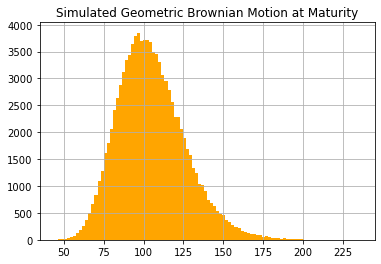

In [4]:
# Plot the histogram of the simulated price path at maturity
price_path.iloc[-1].hist(bins=100, color='orange')
plt.title('Simulated Geometric Brownian Motion at Maturity');

### Visualization of Simulated Paths

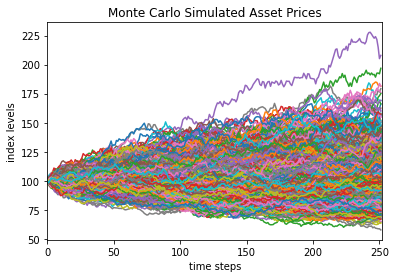

In [5]:
# Plot initial 100 simulated path using matplotlib
plt.plot(price_path.iloc[:,:1000])
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('index levels')
plt.title('Monte Carlo Simulated Asset Prices');

## Risk-Neutral Valuation

A call option gives the holder of the option the right to buy the asset at a pre-defined price. A call buyer makes money if the price of the asset at maturity, denoted by $S_T$, is above the strike price $K$, otherwise it's worth nothing.

$$C_T = max(0,S_T - K)$$

The price of an option using a Monte Carlo simulation is the expected value of its future payoff. So at any date before maturity, denoted by $t$, the option's value is the present value of the expectation of its payoff at maturity, $T$.

$$C = PV\bigg(\mathbb{E}(max(0,S_T - K)\bigg)$$

Under the risk-neutral framework, we assume the asset is going to earn, on average, the risk-free interest rate. Hence, the option value at time $t$ would simply be the discounted value of the expected payoff.

$$C = e^{-r(T-t)}\bigg(\mathbb{E}(max(0,S_T - K)\bigg)$$

### European Option

To price an option, we generate many possible price paths that the asset might take at maturity and then calculate option payoffs for each of those generated prices, average them to get the expected payoff and then discount it at risk free to arrive at the final value.

Given that Monte Carlo algorithms are computationaly heavy, it is necessary to implement efficiently. We'll use vectorization with NumPy for effective algorithm as NumPy syntax are more compact and are faster.

In [6]:
# Call the simulation function
S = simulate_path(100,0.05,0.2,1,252,100000)

# Define parameters
K=100; r=0.05; T=1

# Calculate the discounted value of the expeced payoff
C0 = exp(-r*T) * mean(maximum(0, S[-1]-K))
P0 = exp(-r*T) * mean(maximum(0, K-S[-1]))

# Print the values
print(f"European Call Option Value is {C0:0.4f}")
print(f"European Put Option Value is {P0:0.4f}")

European Call Option Value is 10.3662
European Put Option Value is 5.5836


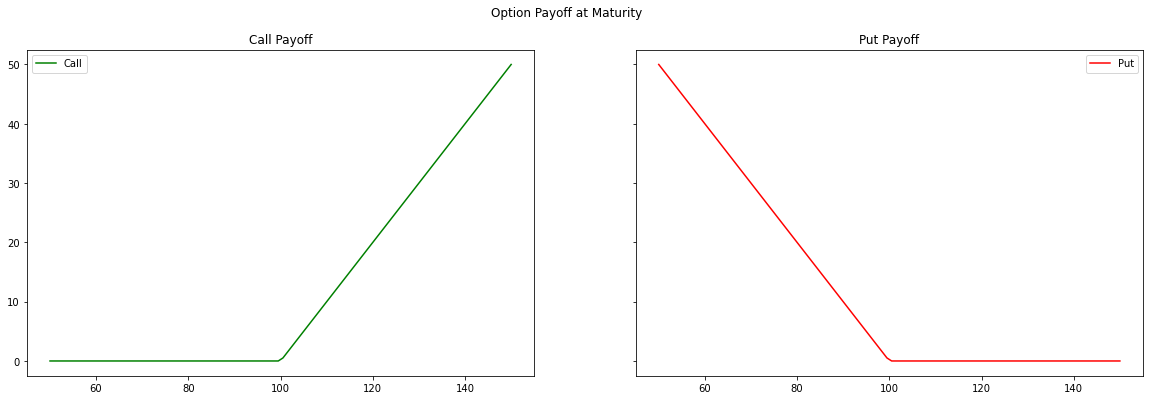

In [7]:
# range of spot prices 
sT= linspace(50,150,100)

# visualize call and put price for range of spot prices
figure, axes = plt.subplots(1,2, figsize=(20,6), sharey=True)
title, payoff, color, label = ['Call Payoff', 'Put Payoff'], [maximum(sT-K, 0), maximum(K-sT, 0)], ['green', 'red'], ['Call', 'Put']

# plot payoff 
for i in range(2):
    axes[i].plot(sT, payoff[i], color=color[i], label=label[i])
    axes[i].set_title(title[i])
    axes[i].legend()

figure.suptitle('Option Payoff at Maturity');

### Asian Call Option

Asian Call Option

An Asian option is an option where the payoff depends on the average price of the underlying asset over a certain period of time. Averaging can be either be Arithmetic or Geometric. There are two types of Asian options: **fixed strike**, where averaging price is used in place of underlying price; and **fixed price**, where averaging price is used in place of strike.

We'll now price a fixed strike arthmetic average option using Monte Carlo simulation.

**The payoff of the options is given by**

$$C_T = max( 0, \frac{1}{T}\sum_{i=1}^T S_i - K )$$

$$C_T = max( 0,  S_{Avg} - K )$$

where $S_{Avg}$ is the average price of the underlying asset over the life of the option. To price an option using a Monte Carlo simulation we use a risk-neutral valuation, where the fair value for a derivative is the expected value of its future payoff. So at any date before maturity, denoted by $t$, the option's value is the present value of the expectation of its payoff at maturity, $T$.

$$C = PV\bigg(\mathbb{E}(max(0,S_{Avg} - K)\bigg)$$

Under the risk-neutral framework, we assume the asset is going to earn, on average, the risk-free interest rate. Hence, the option value at time $t$ would simply be the discounted value of the expected payoff.

$$C = e^{-r(T-t)}\bigg(\mathbb{E}(max(0,S_{Avg} - K)\bigg)$$

In [8]:
# Call the simulation function
S = simulate_path(100,0.05,0.2,1,252,100000)

# Define parameters
K=100; r=0.05; T=1

# Average price
A = S.mean(axis=0)
    
C0 = exp(-r*T) * mean(maximum(0, A-K))
P0 = exp(-r*T) * mean(maximum(0, K-A))

# Print the values
print(f"Asian Call Option Value is {C0:0.4f}")
print(f"Asian Put Option Value is {P0:0.4f}")

Asian Call Option Value is 5.7214
Asian Put Option Value is 3.3323


### Up-and-out Barrier Call Option

Barrier Options are path dependent exotic options whose payoff depends on whether the price of the underlying asset crosses a pre specified level (called the ‘barrier’) before the expiration. The four main types of barrier options are:

- Up-and-out
- Down-and-out
- Up-and-in
- Down-and-in

Refer Paul Wilmott on Quantitative Finance Chapter 23 — Barrier Options and Chapter 77 — Finite Difference Methods for One-factor Models for further details on barriers.

Next, we will price a Up-Out-Call barrier with and without rebate using Monte Carlo simulation. Barrier options can be priced using analytical solutions if we assume continuous monitoring of the barrier. However, in reality many barrier contracts specify discrete monitoring.

In a paper titled A Continuity Correction for Discrete Barrier Option, Mark Broadie, Paul Glasserman and Steven Kou have shown us that the discrete barrier options can be priced using continuous barrier formulas by applying a simple continuity correction to the barrier. The correction shifts the barrier away from the underlying by a factor of

$$e^{\beta \sigma \sqrt{\Delta t}}$$

, where $\beta \approx 0.5826$ and $\sigma$ is the underlying volatility, and $\Delta t$ is the time between monitoring instants. We will apply this continuity correction in our pricing method as well.

In [9]:
# Call the simulation function
S = simulate_path(100,0.05,0.2,1,252,100000)

# Define parameters
K=100; B=150; r=0.05; sigma=0.20; T=3; t=756; dt=T/t; n=100000; rebate = 30; value=0

# Barrier shift - continuity correction for discrete monitoring
B_shift = B*exp(0.5826*sigma*sqrt(dt))
B_shift

# Calculate the discounted value of the expeced payoff
for i in range(n):
    if S[:,i].max() < B_shift:
        value += maximum(0, S[-1,i]-K)
    else:
        value += rebate

C0 = exp(-r*T) * value/n

# Print the values 
print(f"Up-and-Out Barrier Call Option Value is {C0:0.4f}")

Up-and-Out Barrier Call Option Value is 8.3811


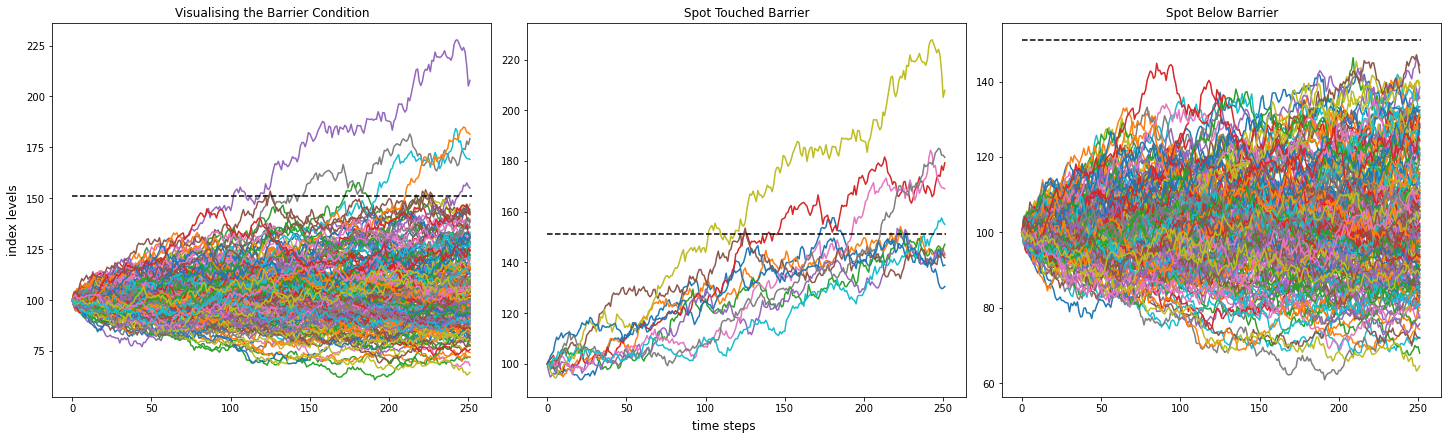

In [10]:
figure, axes = plt.subplots(1,3, figsize=(20,6), constrained_layout=True)
title = ['Visualising the Barrier Condition', 'Spot Touched Barrier', 'Spot Below Barrier']

axes[0].plot(S[:,:200])      
for i in range(200):
    axes[1].plot(S[:,i]) if S[:,i].max() > B_shift else axes[2].plot(S[:,i])

for i in range(3):
    axes[i].set_title(title[i])
    axes[i].hlines(B_shift, 0, 252, colors='k', linestyles='dashed')

figure.supxlabel('time steps')
figure.supylabel('index levels')

plt.show()

## References

- Paul Glasserman (2004), Monte Carlo Methods in Financial Engineering
- Paul Wilmott (2007), Paul Wilmott introduces Quantitative Finance
- Python Resources
- Understanding Options